#$Knapsack \ \ Problem$

$Given \ \ weights \ \ and \ \ values \ \ of \ \ n \ \ items, \ put \ \ these \ \ items \ \ in \ \ a \ \ knapsack \\ of \ \ capacity \ \ W \ \ to \ \ get the \ \ maximum \ \ total \ \ value \ \ in \ \ the \ \ knapsack$

## $0-1 \ \ Integer \ \ Programming$


$\large{ \displaystyle Maximize \ \ \sum_{i=1}^{n}{v_i x_i} }$

$\large{\displaystyle Subject \ \ to \ \ \sum_{i=1}^{n}{w_i x_i} \leq W_{max} \ \ and \ \ x_i \in \ \ \left\{0,1\right\}}$

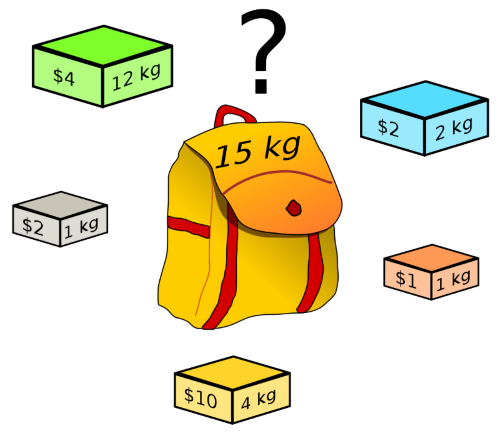

Que. Which items should be chosen to maximize the amount of money while still keeping the overall weight under or equal to 15 kg?

Soln: If any number of each item is available, then three yellow items and three grey items; if only the shown items are available, then all except for the green item.

In [1]:
# @title $0-1 \ \ Knapsack \ \ Problem$
# @markdown The most common problem being solved is the $0-1 \ \ knapsack \ \ problem$ , which restricts the number \
# @markdown $x_i$ of copies of each kind of item to $zero$ or $one$. Given a set of $n$ items numbered from $1$ up to $n$ \
# @markdown each with a weight $w_i$ and a value $v_i$, along with a maximum weight capacity $W.$
from IPython.display import HTML, Math, display
import sympy as sp
import numpy as np

def item_print(items, i,j):
    expr = r'\left\{ '
    for k in range(i,j-1):
        expr = expr + r'e_{' + sp.latex(k) + r'},'

    k = j-1
    expr = expr + r'e_{' + sp.latex(k) + r'}'
    expr = expr + r'\right\}'

    return expr

def item_printE(items, i,j):
    expr = r'\left\{ '
    for k in range(i,j-1):
        expr = expr + r'E_{' + sp.latex(k) + r'},'

    k = j-1
    expr = expr + r'E_{' + sp.latex(k) + r'}'
    expr = expr + r'\right\}'

    return expr

def ret_Matrix2(A,r,c):
    m = len(A)
    n = len(A[0])
    expr = r'\Large{\begin{bmatrix}'

    for i in range(m):
        for j in range(n):
            if(i==r and j==c):
                expr = expr + r'{\color{Red}{' + sp.latex(A[i][j]) + r'}}' + r' & '

            elif(i<r):
                expr = expr + sp.latex(A[i][j]) + r' & '
            elif(i==r and j < c):
                expr = expr + sp.latex(A[i][j]) + r' & '
            else:
                if (j != (n-1)):
                    expr = expr + r'{\color{Red}{ }}' + r' & '

        if (i != (m-1)):
            expr = expr + r' \\ '
    expr = expr + r'\end{bmatrix}}'

    return (expr)

display(Math(r'\large{\displaystyle Maximize \ \ \sum_{i=1}^{n}{v_i x_i}}'))
display(Math(r'\large{\displaystyle Subject \ \ to \ \ \sum_{i=1}^{n}{w_i x_i} \leq W \ \ and \ \ x_i \in \ \ \left\{0,1\right\}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
# @title $weights \ \ and \ \ values \ \ of \ \ items$
mode = "random" # @param ["manual", "random"]

if(mode == "manual"):
    check=0
    while(check==0):
        check=1
        try:
            Weights=[sp.Rational(i) for i in input("Enter the weights seperated by ',' : W = ").split(',')]   #Weights
            Values=[sp.Rational(i) for i in input("Enter the values seperated by ',' : V = ").split(',')]    #Values
            n = len(Weights)
            if(len(Weights) != len(Values)):
                print('Please enter same number of weights and values')
                check=0
            else:
                if((0 in Weights) and Values[Weights.index(0)] !=0 ):
                    if(Values[Weights.index(0)]==0):
                        print('weight of first item is zero but its value is', Values[0])
                        check=0
                    elif(Values[Weights.index(0)]==1):
                        print('weight of second item is zero but its value is', Values[1])
                        check=0
                    elif(Values[Weights.index(0)]==2):
                        print('weight of third item is zero but its value is', Values[2])
                        check=0
                    else:
                        print('weight of ',(Weights.index(0)+1),'th item is zero but its value is ', Values[Weights.index(0)], sep='')
                        check=0
                else:
                    if(any(num < 0 for num in Weights)):
                        print('Please enter non-negative weights')
                        check=0

                    if(any(num < 0 for num in Values)):
                        print('Please enter non-negative values')
                        check=0

        except:
            print('Please enter non-negative integer weights')
            check=0

else:
    check=0
    while(check==0):
        try:
            n = int(input('number of items = '))
            if(n <= 0):
                print('Please enter positive integer')
                check=0
            else:
                check = 1
        except:
            print('Please enter positive integer')
            check=0

    Weights = list(np.random.randint(2,int(2*n),n))
    Values = list(np.random.randint(1,int(2*n),n))

print('weights =',Weights)
print('values =',Values)

number of items = 5
weights = [5, 9, 2, 7, 6]
values = [3, 5, 4, 9, 4]


In [3]:
# @title $maximum \ \ weight \ \ knapsack \ \ can \ \ carry$
check=0
while(check==0):
    try:
        C = int(input('Maximum weight : '))
        print()

        if(C >= 0):
            check=1
        else:
            print('Maximum weight cannot be negative!')
            check=0
    except:
        print('Please enter only non-negative integer weight')

Maximum weight : 12



In [4]:
# @title $Step1: Add \ \ e_0 \ \ in \ \ available \ \ items$

display(Math(r'\large{Add \ \ the \ \ 0^{th} \ \ item \ \ e_0 \ \ to \ \ the \ \ list \ \ with \ \ weight \ \ w_0=0 \ \ and \ \ value \ \ v_0=0}'))
W0 = Weights.copy()
V0 = Values.copy()
if(0 not in W0):
    W0.append(0)
    V0.append(0)

display(Math(r'\large{weights='+sp.latex(W0) + r'}'))
display(Math(r'\large{values='+sp.latex(V0) + r'}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# @title $Step2:Sort \ \ Items$

display(Math(r'\large{Now, \ \ sort \ \ the \ \ items \ \ by \ \ ascending \ (increasing) \ \ weights}'))
WV_pair = []
for i in range(len(W0)):
    WV_pair.append((W0[i],V0[i]))

WV_pair = sorted(WV_pair, key=lambda element: (element[0],-1*element[1]))


W = [(i[0]) for i in WV_pair]
V = [(i[1]) for i in WV_pair]
Weights = [(i[0]) for i in WV_pair[1:]]
Values = [(i[1]) for i in WV_pair[1:]]


items0 = [('e'+str(i)) for i in range (len(W))]
display(Math(r'\large{ items='+ item_print(items0, 0,len(W)) +r'}'))
display(Math(r'\large{ weights='+sp.latex(W) +r'}'))
display(Math(r'\large{ values='+sp.latex(V)+ r'}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# @title $Step 3: Create \ \ Empty \ \ Table \ (Matrix)$

display(Math(r'\large{Create \ \ a \ \ matrix \ \ M \ \ such \ \ that}'))
display(Math(r' \ \ \ \ \large{ i) \ There \ \ is \ \ one \ \ row \ \ for \ \ each \ \ element \ \ (e_0 \ \ to \ \ e_n) }'))
display(Math(r' \ \ \ \ \large{ii) \ There \ \ is \ \ one \ \ column \ \ for \ \ each \ \ weight \ \ (0 \ \ to \ \ W_{max} ) }'))
M = [[0 for i in range(C+1)] for j in range(n+1)]

print()
display(Math(r'\Large{M_{(n+1 , W_{max}+1)}}'))
print()
display(Math(r'\Large{i.e. \ M_{(' + sp.latex(n+1) + r',' + sp.latex(C+1) + r')}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$M_{i,j} - (i,j)^{th} \ \ entry \ \ of \ \ matrix \ \ represents \ \ the \ \ solution \ \ of \ \ Knapsack \ \ Problem \\ for \ \ first \ \ i \ \ elements \ \ (e_1 \ \ to \ \ e_i) \ \ with \ \ maximum \ \ allowed \ \ weight \ \ W_{max}=j$

In [10]:
# @title $Dynamic \ \ Programming \ \ Method \ \ (Detailed)$
items = [('e'+str(i)) for i in range (n+1)]
if(True):
    for i in range(1,n+1):
        if(i==1):
            display(Math(r'\large{Weight \ \ and \ \ value \ \ of \ \ the \ \ first \ \ item}'))
        else:
            display(Math(r'\large{Weights \ \ and \ \ values \ \ of \ \ the \ \ first \ \ {' + sp.latex(i) + '} \ \ items }'))

        display(Math(r'\large{items ='+item_print(items, 1,i+1) + r'}'))
        display(Math(r'\large{weights ='+sp.latex(W[1:i+1]) + r'}'))
        display(Math(r'\large{values ='+sp.latex(V[1:i+1]) + r'}'))
        print()
        for j in range(1,C+1):
            display(Math(r'\large{{\color{Red}{Calculations \ \ for \ \ M['+ sp.latex(i) +r','+ sp.latex(j) +r']}}}'))
            display(Math(r'\large{for \ \ e_{'+sp.latex(i)+r'}, \ \ w_{'+sp.latex(i)+r'}='+sp.latex(W[i])+r' \ \ and \ \ v_{'+sp.latex(i)+r'}='+sp.latex(V[i]) + r'}'))
            if(i==1):
                display(Math(r'\ \ \ \ \ \ \large{if \ \ there \ \ is \ \ only \ \ the \ \ first \ \  item \ \ ' + item_print(items, 1,i+1) + r' \ \ and \ \ the \ \  maximum \ \ allowed \ \ weight \ \ is \ \ W_{max}=' + sp.latex(j) + r'}'))
            else:
                display(Math(r'\ \ \ \ \ \ \large{if \ \ there \ \ are \ \ only \ \ the \ \ first \ \ '+sp.latex(i)+' \ \ items \ \ ' + item_print(items, 1,i+1) + r' \ \ and \ \ the \ \ maximum \ \ allowed \ \ weight \ \ is \ \ W_{max}=' + sp.latex(j) + r'}'))

            if(j >= W[i]):
                display(Math(r'\ \ \ \ \ \ \large{as \ \ W_{max} \geq w_{' + sp.latex(i) +r'}(=' +sp.latex(W[i])+ r')}'))
                display(Math(r'\ \ \ \ \ \ \large{ \therefore \ if \ \ we \ \ keep \ \ e_{' + sp.latex(i) + r'} \ \ in \ \ the \ \ Knapsack, W_{Bag} = {' + sp.latex(W[i]) + r'} \ ; \ V_{Bag} = {' + sp.latex(V[i]) + r'}}'))
                alpha = V[i]

                display(Math(r'\ \ \ \ \ \ \large{now \ \ the \ \ remaining \ \ allowed \ \ weight \ \ is: W_{Rmax} = W_{max} - W_{Bag} = {' + sp.latex(j-W[i]) + r'}}'))
                display(Math(r'\ \ \ \ \ \ \large{and \ \ the \ \ maximum \ \ value \ \ with \ \ the \ \ first \ \ ' +sp.latex(i-1)+ ' \ \ items \ \ and \ \ weight \ \ at \ \ most \ \ '
                            +sp.latex(j-W[i])+ r' \ \ is \ \ M['+sp.latex(i-1)+r',' + sp.latex(j-W[i]) +r']}'))
                display(Math(r'\ \ \ \ \ \ \large{V_{Rmax} = M[{' + sp.latex(i-1) + r'},{' + sp.latex(j-W[i]) + r'}]={' + sp.latex(M[i-1][j-W[i]]) + r'}}'))
                beta = M[i-1][j-W[i]]

                gamma = alpha + beta
                if(gamma > M[i-1][j]):
                    display(Math(r'\ \ \ \ \ \ \large{as \ \ V_{Bag}+V_{Rmax} > M[{'+sp.latex(i-1)+ r'},{'+sp.latex(j)+ r'}](={'+sp.latex(M[i-1][j-1])+
                                 r'}), \ \ we \ \ will \ \ keep \ \ item \ \ e_{'+sp.latex(i)+ r'} \ \ in \ \ the \ \ knapsack }'))
                    display(Math(r'\ \ \ \ \ \ \large{\therefore \ M[{'+sp.latex(i)+ r'},{'+sp.latex(j)+ r'}]=V_{Bag}+V_{Rmax}={'+sp.latex(alpha)+ r'}+{'+sp.latex(beta)+ r'}={'+sp.latex(gamma)+ r'}}'))
                    M[i][j] = gamma
                else:
                    display(Math(r'\ \ \ \ \ \ \large{as \ \ V_{Bag}+V_{Rmax} \leq M[{' + sp.latex(i-1) + r'},{' + sp.latex(j) + r'}](={' + sp.latex(M[i-1][j]) + r"}), we \ \ won't \ \ keep \ \ item \ \ e_{" +sp.latex(i)+ r'} \ \ in \ \ the \ \ Knapsack}'))
                    display(Math(r' \ \ \ \ \ \ \large{so, \ \ the \ \ maximum \ \ value \ \ of \ \ items \ \ in \ \ the \ \ knapsack \ \ will \ \ remain \ \ the \ \ same \ \ as \ \ that \ \ of \ \ the \ \ first \ \ '
                            +sp.latex(i-1) + r' \ \ items \ \ with \ \ a \ \ maximum \ \ weight \ \ of \ \ ' + sp.latex(j) + r', \ \ which \ \ is \ \ M[' +sp.latex(i-1)+ r',' + sp.latex(j) + r']}'))
                    display(Math(r' \ \ \ \ \ \ \ \large{ \therefore  \ M[{'+sp.latex(i)+ r'},{'+sp.latex(j)+ r'}]=M[{'+sp.latex(i-1)+ r'},{'+sp.latex(j)+ r'}]={'+sp.latex(M[i-1][j])+ r'}}'))
                    M[i][j] = M[i-1][j]

            else:
                display(Math(r' \ \ \ \ \ \ \large{ as \ \ W_{max} < w_{' + sp.latex(i) +r"}, \ \ we \ \ can't \ \ keep \ \ item \ \ e_{" + sp.latex(i) + r'} \ \ in \ \ the \ \ Knapsack }'))
                display(Math(r' \ \ \ \ \ \ \large{ so, \ \ the \ \ maximum \ \ value \ \ of \ \ items \ \ in \ \ the \ \ knapsack \ \ will \ \ remain \ \ the \ \ same \ \ as \ \ that \ \ of \ \ the \ \ first \ \ '
                            +sp.latex(i-1) + r' \ \ items \ \ with \ \ a \ \ maximum \ \ weight \ \ of \ \ ' + sp.latex(j) + r', \ \ which \ \ is \ \ M[' +sp.latex(i-1)+ r',' + sp.latex(j) + r']}'))
                display(Math(r'\ \ \ \ \ \ \large{\therefore M[{'+sp.latex(i)+ r'},{'+sp.latex(j)+ r'}]=M[{'+sp.latex(i-1)+ r'},{'+sp.latex(j)+ r'}]={'+sp.latex(M[i-1][j])+ r'}}'))
                M[i][j] = M[i-1][j]

            print()
            #display(Math(r'M=' + sp.latex(sp.Matrix(M))))
            display(Math(r'M=' + ret_Matrix2(M,i,j)))
            print('-------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


In [11]:
# @title $whcih \ \ items \ \ to \ \ select \ ?$
import pandas as pd

col_names = [('Wmax = '+str(i)) for i in range(C+1)]
table = pd.DataFrame(M, columns = col_names, index = WV_pair, )
table.index.names = ['(weight,value)']
display(table)
print()

display(Math(r'M['+sp.latex(n-1)+r','+sp.latex(C)+r'] = '+sp.latex(M[n-1][C])+r'\ \ \therefore \ \ maximum \ \ value \ \ we \ \ can \ \ get \ \ is \ \ '
             + sp.latex(M[-1][-1])))
print()

avl_value = M[-1][-1]
max_weight = C
indices_items_chosen = []
items_chosen = []
bag_weight = 0
bag_value = 0

row=n
col=C
while(avl_value > 0):
    display(Math(r'Now, \ \ we \ \ have \ \ to \ \ choose \ \ from \ \ '+sp.latex(row)+r' \ \ items, \ \ with \ \ a \ \ maximum \ \ weight \ \ of \ \ '+sp.latex(C-bag_weight)))
    display(Math(r'\ \ \ \ \ \ so, \ \ start \ \ from \ \ M[' + sp.latex(row) + r',' + sp.latex(col) + r']'))
    while(M[row-1][col] == M[row][col]):
        display(Math(r'\ \ \ \ \ \ since \ \ M[' + sp.latex(row) + r',' + sp.latex(col) + r']=M[' + sp.latex(row-1) + r',' + sp.latex(col) +r'],' +
                     r" \ \ we \ \ won't \ \ select \ \ item \ \ e_{" + sp.latex(row) + r'} \ \ ' ))
        print()

        row = row - 1

    display(Math(r'\ \ \ \ \ \ as \ \ M[' + sp.latex(row) + r',' + sp.latex(col) + r'] > M[' + sp.latex(row-1) + r',' + sp.latex(col) +r'],' +
                     r" \ \ we \ \ select \ \ item \ \ e_{" + sp.latex(row) + r'} \ \ ' ))

    indices_items_chosen.append(row)
    items_chosen.append(items0[row])
    bag_value = bag_value + V[row]
    bag_weight = bag_weight + W[row]
    display(Math(r'\ \ \ \ \ \ \therefore \ \ the \ \ weight \ \ of \ \ the \ \ items \ \ in \ \ the \ \ knapsack \ \ is \ \ ' + sp.latex(bag_weight) +r'\ \ and \ \ the \ \ value \ \ is \ \ '
                 + sp.latex(bag_value)))
    avl_value = M[-1][-1] - bag_value
    row = row - 1
    col = C - bag_weight
    print()

expr = r'\left\{ '
for k in indices_items_chosen:
    expr = expr + r'e_{' + sp.latex(k) + r'},'
expr = expr + r'\right\}'

display(Math(r'\Large{Finally, \ \ the \ \ items \ \ chosen \ \ are \ \ ' + expr +
             r' \ \ with \ \ a \ \ total \ \ weight \ \ of \ \ '+ sp.latex(bag_weight)+r'}'))
display(Math(r'\Large{and \ \ a \ \ total \ \ value \ \ of \ \ ' +sp.latex(bag_value)+r'}'))

,Wmax = 0,Wmax = 1,Wmax = 2,Wmax = 3,Wmax = 4,Wmax = 5,Wmax = 6,Wmax = 7,Wmax = 8,Wmax = 9,Wmax = 10,Wmax = 11,Wmax = 12
"(weight,value)",,,,,,,,,,,,,
"(0, 0)",0,0,0,0,0,0,0,0,0,0,0,0,0
"(2, 4)",0,0,4,4,4,4,4,4,4,4,4,4,4
"(5, 3)",0,0,4,4,4,4,4,7,7,7,7,7,7
"(6, 4)",0,0,4,4,4,4,4,7,8,8,8,8,8
"(7, 9)",0,0,4,4,4,4,4,9,9,13,13,13,13
"(9, 5)",0,0,4,4,4,4,4,9,9,13,13,13,13


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>